In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

*   age: age in year
*   sex: 1 = male + O = female
*   cp: chest pain type
*   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
*   chol: serum cholestoral in mg/dl
*   fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   restecg: resting electrocardiographic results
*   thalach: maximum heart rate achieved
*   exang: exercise induced angina (1 = yes; 0 = no)
*   oldpeak:  ST depression induced by exercise relative to rest
*   slope: the slope of the peak exercise ST segment
*   ca: number of major vessels (0-3) colored by flourosopy
*   thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
*   target: 0 = no disease + 1 = disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Get general info about the dataset. Are there any values missing?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are 2 values for target (0 and 1), so this is a binary classification.   
Before we can start the classification, we have to know if this is a skewed dataset.

In [7]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

What is X and what is y?

In [9]:
X_pre_transform = df.drop("target",axis=1)
y = df["target"]

Use min-max scaling on X.  

In [10]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_tr = min_max_scaler.fit_transform(X_pre_transform)

Put the transformed data back into a dataframe.  
Take a look at the data in the dataframe.

In [11]:
X_transform = pd.DataFrame(X_tr,columns=X_pre_transform.columns)
X_transform.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


Determine X_train, y_train, X_test and y_test. Since we have no extra information, we can ignore stratified sampling. 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_transform,y,random_state=42)

What is the number of records in X_train en X_test?

In [13]:
print(len(X_train))
print(len(X_test))

768
257


Use the SGD classifier to do the classification.  
Make sure the results are reproducible.

In [14]:
from sklearn.linear_model import  SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [15]:
y_predict = sgd_clf.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.7704280155642024


What is the accuracy of the model?  
Use K-fold cross-validation. Make the following overview.  
Why does the overview starts with k = 2 instead of k = 1?  

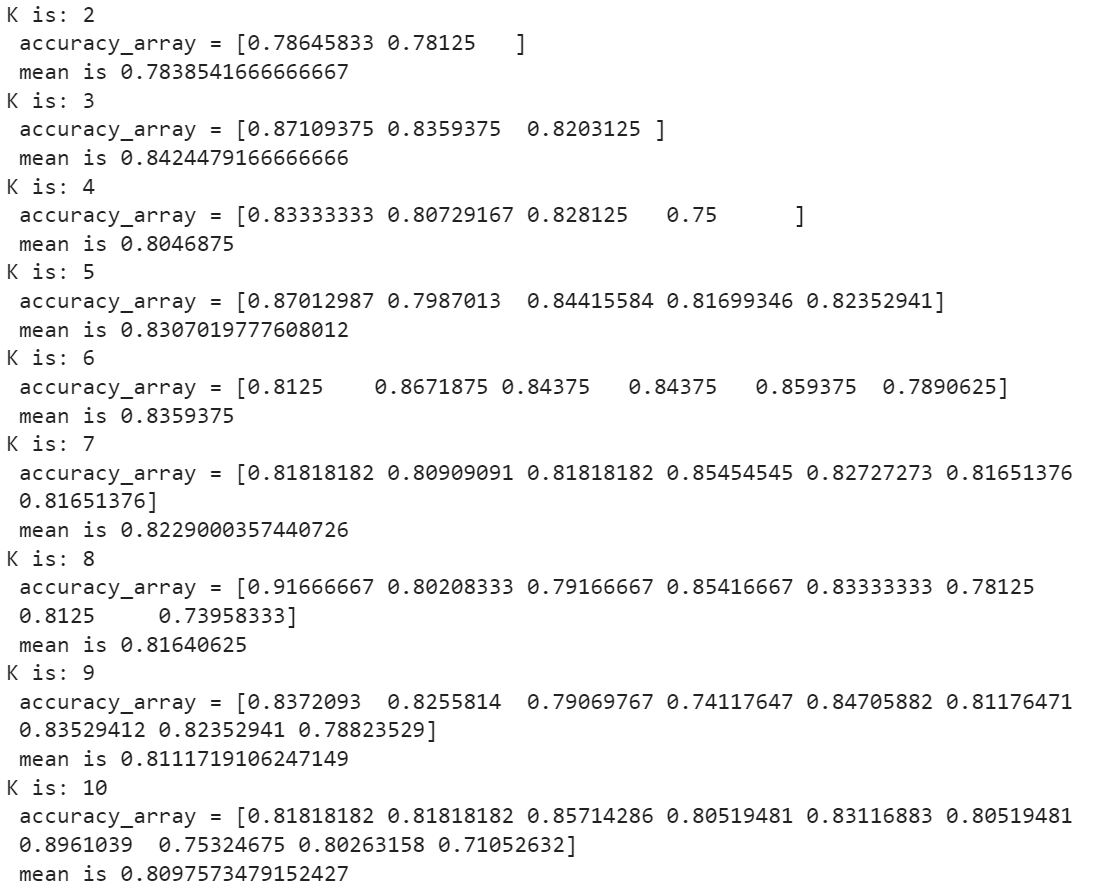

In [18]:
from sklearn.model_selection import cross_val_score

for k in range(2,11):
    scores = cross_val_score(sgd_clf,X_train,y_train, cv=k,scoring='accuracy')
    print(f'K is: {k} \n accuracy_array = {scores} \n mean is {np.mean(scores)}')
    

K is: 2 
 accuracy_array = [0.84635417 0.828125  ] 
 mean is 0.8372395833333333
K is: 3 
 accuracy_array = [0.86328125 0.86328125 0.81640625] 
 mean is 0.84765625
K is: 4 
 accuracy_array = [0.81770833 0.83333333 0.875      0.68229167] 
 mean is 0.8020833333333334
K is: 5 
 accuracy_array = [0.76623377 0.81818182 0.79220779 0.90196078 0.80392157] 
 mean is 0.8165011459129106
K is: 6 
 accuracy_array = [0.8515625 0.8203125 0.890625  0.7890625 0.8359375 0.8203125] 
 mean is 0.8346354166666666
K is: 7 
 accuracy_array = [0.83636364 0.82727273 0.84545455 0.84545455 0.84545455 0.82568807
 0.81651376] 
 mean is 0.8346002621231979
K is: 8 
 accuracy_array = [0.83333333 0.84375    0.82291667 0.875      0.86458333 0.88541667
 0.82291667 0.77083333] 
 mean is 0.83984375
K is: 9 
 accuracy_array = [0.84883721 0.79069767 0.89534884 0.82352941 0.83529412 0.82352941
 0.87058824 0.82352941 0.75294118] 
 mean is 0.8293661650706794
K is: 10 
 accuracy_array = [0.87012987 0.87012987 0.79220779 0.8831168

The following code shows how to implement Leave-One-Out Cross-Validation (LOOCV):  
*   All but one observation of the training set is used to build the model.
*   Use the model to predict the response value of the one observation left out of the model
*   This is repeated for each observation in the dataset

In [75]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
scores = cross_val_score(sgd_clf, X_train, y_train, cv=cv, scoring="accuracy")
print(f"The mean in case of LOOCV is: {np.mean(scores)}")

The mean in case of LOOCV is: 0.8359375


Give the confusion matrix for the best value of k that you obtained before.

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv=3)

from sklearn.metrics import  confusion_matrix
conf_mx = confusion_matrix(y_train,y_train_pred)
print(conf_mx)

[[289  78]
 [ 39 362]]


Visualize the confusion matrix

Text(88.68, 0.5, 'Actual class')

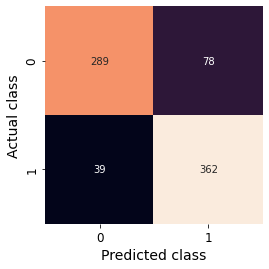

In [21]:
import seaborn as sns
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

Give the number of True Negatives, True Positives, False Positives, False Negatives.  
TN = 289   
FN = 39    
FP = 78   
TP = 362

In [25]:
FN = conf_mx[1][0]
TP = conf_mx[1][1]
TN = conf_mx[0][0]
FP = conf_mx[0][1]
print(FN)

39


What is worse in this case: False Positives or False Negatives?

Calculate the precision and the recall using the above values.  
The precision is: 0.8227272727272728  
The recall is: 0.9027431421446384

In [28]:
precision = TP/(TP + FP)
print(precision)
recall = TP / (TP + FN)
print(recall)

0.8227272727272728
0.9027431421446384


Calculate the precision and recall using sklearn  
The precision is: 0.8227272727272728  
The recall is: 0.9027431421446384

In [29]:
from sklearn.metrics import precision_score,recall_score
print( precision_score(y_train,y_train_pred))
print( recall_score(y_train,y_train_pred))

0.8227272727272728
0.9027431421446384


In [30]:
from sklearn.metrics import f1_score
print(f1_score(y_train,y_train_pred))

0.8608799048751486


What is meant with precision and recall in this context?

Calculate F1 score using the above values.  
F1 is: 0.8608799048751486


F1 is: 0.8608799048751486


Calculate F1 score using the sklearn.  
F1 is: 0.8608799048751486

F1 is: 0.8608799048751486


With this number of FN, no doctor is going to use this system. You need to improve the system.  
Is it a good idea to try to improve the precision or recall in this case by changing the threshold?  
You decide to make the following plot.

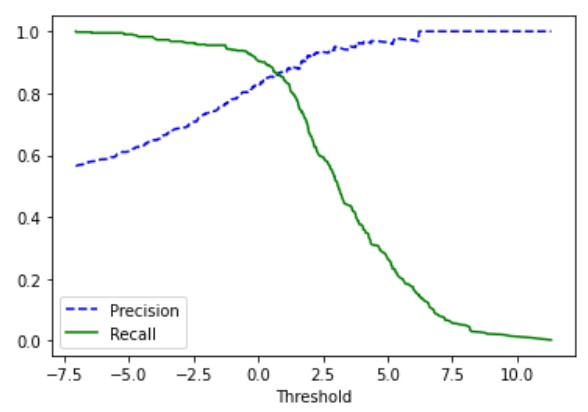

To make this plot, you will first need to get the scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of predictions.

In [32]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train,cv=3,method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train,y_scores)

With these scores you can compute precision and recall for all possible thresholds using the precision_recall_curve() function

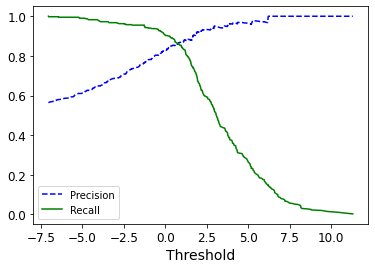

In [35]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.legend(loc="lower left")
    plt.xlabel("Threshold")
    
plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()

Now, you can plot precision and recall as functions of the threshold value using Matplotlib.

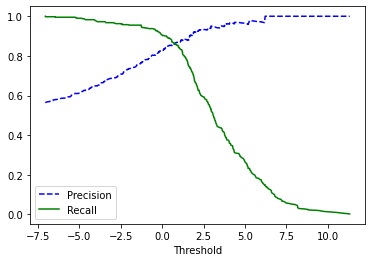

What would be a good value for the threshold based on this plot?


To decrease the false negatives we have to increase the recall (or true positive rate). Determine the threshold for a recall of 0.95 (iso 0.90)

In [36]:
thresholds[:20]

array([-7.04446588, -7.030411  , -7.00994976, -6.97052846, -6.91441244,
       -6.76427765, -6.74479458, -6.7429346 , -6.69205879, -6.64629767,
       -6.58871816, -6.58608489, -6.55664865, -6.48525224, -6.43767852,
       -6.42640168, -6.223172  , -6.19224726, -6.18315343, -6.16609976])

In [37]:
recalls[:20]

array([1.        , 0.99750623, 0.99750623, 0.99750623, 0.99750623,
       0.99750623, 0.99750623, 0.99750623, 0.99750623, 0.99750623,
       0.99750623, 0.99750623, 0.99750623, 0.99750623, 0.99750623,
       0.99501247, 0.99501247, 0.99501247, 0.99501247, 0.99501247])

In [39]:
threshold_95_recall = thresholds[np.argmax(recalls <= 0.95)]
y_train_pred_95 = (y_scores >= threshold_95_recall)
print(f'Precision={precision_score(y_train,y_train_pred_95)}')
print(f'Recall={recall_score(y_train,y_train_pred_95)}')

Precision=0.7645875251509054
Recall=0.9476309226932669


Show the confusion matrix again with this new threshold value to see if FN has improved.

In [40]:
conf_mx = confusion_matrix(y_train,y_train_pred_95)
print(conf_mx)

[[250 117]
 [ 21 380]]


Text(91.68, 0.5, 'Actual class')

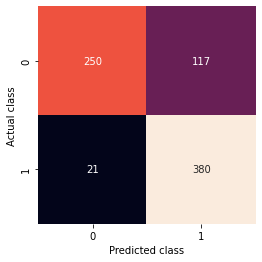

In [90]:
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

FN has decreased from 39 to 21. 

Is it perhaps useful to plot the ROC curve (receiver operating characteristic)? The ROC curve plots the true positive rate against the false positive rate.   To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function.

TPR = recall = TP/(TP + FN)
FPR = FP / (FP + TN)

Then you can plot the FPR against the TPR using Matplotlib.

In [42]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train,y_scores)

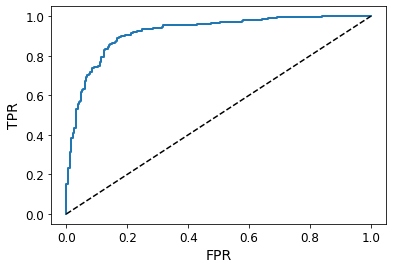

In [44]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
plot_roc_curve(fpr,tpr)

Calculate the ROC AUC score  
The ROC AUC score is = 0.9203286062772225

In [45]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,y_scores))

0.9203286062772225


Perhaps it's a good idea to use another classifier?  
Use a RandomForestClassifier to make predictions.

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42,n_estimators=5)


Show the confusion matrix

In [52]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf,X_train,y_train,cv=3)

conf_mx = confusion_matrix(y_train,y_train_pred)
print(conf_mx)

[[339  28]
 [ 21 380]]


Calculate precision, recall and F1-score and compare to the SGDClassifier


In [53]:

print(recall_score(y_train,y_train_pred))

0.9476309226932669


In [54]:
forest_clf.fit(X_train,y_train)
y_predict = forest_clf.predict(X_test)
    
print(accuracy_score(y_test,y_predict))

0.980544747081712
